# Can young voters Generation_Z swing the EU election 2024?

In [766]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
%matplotlib inline

import plotly
import plotly.express as px
import plotly.graph_objects as go
plt.rcParams['figure.figsize']=17,8
import cufflinks as cf
import plotly.offline as pyo
from plotly.offline import init_notebook_mode,plot,iplot

import folium
pyo.init_notebook_mode(connected=True)
cf.go_offline()

In [767]:
df = pd.read_csv('data/Eurostat-PopulationProjection2019-proj_15npms.csv')
df.head()

,TIME,GEO,UNIT,AGE,SEX,PROJECTION,Value,Flag and Footnotes
0,2019,European Union - 28 countries,Person,Total,Total,Baseline projections,"514,436,397",NaN
1,2019,European Union - 28 countries,Person,16 years,Total,Baseline projections,"5,235,779",NaN
2,2019,European Union - 28 countries,Person,17 years,Total,Baseline projections,"5,299,432",NaN
3,2019,European Union - 28 countries,Person,18 years,Total,Baseline projections,"5,466,860",NaN
4,2019,European Union - 28 countries,Person,19 years,Total,Baseline projections,"5,465,394",NaN


In [768]:
population = df [['TIME','GEO','AGE','Value']]
population=population[population['AGE']!='Total']      #remove total

population.head(100)

,TIME,GEO,AGE,Value
1,2019,European Union - 28 countries,16 years,"5,235,779"
2,2019,European Union - 28 countries,17 years,"5,299,432"
3,2019,European Union - 28 countries,18 years,"5,466,860"
4,2019,European Union - 28 countries,19 years,"5,465,394"
5,2019,European Union - 28 countries,20 years,"5,551,222"
...,...,...,...,...
97,2019,Belgium,26 years,"150,466"
98,2019,Belgium,27 years,"153,268"
99,2019,Belgium,28 years,"153,383"
100,2019,Belgium,29 years,"151,211"


In [769]:
#remove year from age

asd=population['AGE'].str.split(' ',n = 0, expand = True)   #remove year 
age=asd[0]
population['age']=age
population['age']=population['age'].astype(int)            #convert age to int
del population['AGE']

In [770]:
#remove , from value
def float_conversion(value_str):
    value = float(value_str.replace(',',''))
    return value
population['Value'] = population['Value'].apply(float_conversion)

In [771]:
population.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2465 entries, 1 to 2493
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TIME    2465 non-null   int64  
 1   GEO     2465 non-null   object 
 2   Value   2465 non-null   float64
 3   age     2465 non-null   int32  
dtypes: float64(1), int32(1), int64(1), object(1)
memory usage: 86.7+ KB


In [772]:
population['birth_year']=population['TIME']-population['age']
population.head()

,TIME,GEO,Value,age,birth_year
1,2019,European Union - 28 countries,5235779.0,16,2003
2,2019,European Union - 28 countries,5299432.0,17,2002
3,2019,European Union - 28 countries,5466860.0,18,2001
4,2019,European Union - 28 countries,5465394.0,19,2000
5,2019,European Union - 28 countries,5551222.0,20,1999


In [773]:
# create a list of our conditions
conditions = [(population['birth_year'] >= 1995),(population['birth_year'] < 1995)]

# create a list of the values we want to assign for each condition
values = ['Generation_Z', 'Others']

# create a new column and use np.select to assign values to it using our lists as arguments
population['Classification'] = np.select(conditions, values)

# display updated DataFrame
population.head()

,TIME,GEO,Value,age,birth_year,Classification
1,2019,European Union - 28 countries,5235779.0,16,2003,Generation_Z
2,2019,European Union - 28 countries,5299432.0,17,2002,Generation_Z
3,2019,European Union - 28 countries,5466860.0,18,2001,Generation_Z
4,2019,European Union - 28 countries,5465394.0,19,2000,Generation_Z
5,2019,European Union - 28 countries,5551222.0,20,1999,Generation_Z


In [774]:
population=population[['GEO','TIME','age','birth_year','Value','Classification']]                         #change cloumn position
population.columns=(['Country','TIME','age','birth_year','number_people','Classification'])             #change cloumn names
population.head(10)

,Country,TIME,age,birth_year,number_people,Classification
1,European Union - 28 countries,2019,16,2003,5235779.0,Generation_Z
2,European Union - 28 countries,2019,17,2002,5299432.0,Generation_Z
3,European Union - 28 countries,2019,18,2001,5466860.0,Generation_Z
4,European Union - 28 countries,2019,19,2000,5465394.0,Generation_Z
5,European Union - 28 countries,2019,20,1999,5551222.0,Generation_Z
6,European Union - 28 countries,2019,21,1998,5656744.0,Generation_Z
7,European Union - 28 countries,2019,22,1997,5740663.0,Generation_Z
8,European Union - 28 countries,2019,23,1996,5782370.0,Generation_Z
9,European Union - 28 countries,2019,24,1995,5910697.0,Generation_Z
10,European Union - 28 countries,2019,25,1994,6045948.0,Others


In [775]:
# Greece: 17                        remove 16
# Austria and Malta: 16             dont remove
# All others: 18                    remove 16 17

remove16_17=population[((population.Country != 'Austria')&(population.Country != 'Malta') &( population.age == 16)|(population.Country != 'Austria')&(population.Country != 'Malta')&(population.Country != 'Greece') &( population.age == 17))].index
final_data=population.drop(remove16_17)
final_data.to_csv('final_data.csv')
final_data

,Country,TIME,age,birth_year,number_people,Classification
3,European Union - 28 countries,2019,18,2001,5466860.0,Generation_Z
4,European Union - 28 countries,2019,19,2000,5465394.0,Generation_Z
5,European Union - 28 countries,2019,20,1999,5551222.0,Generation_Z
6,European Union - 28 countries,2019,21,1998,5656744.0,Generation_Z
7,European Union - 28 countries,2019,22,1997,5740663.0,Generation_Z
...,...,...,...,...,...,...
2489,United Kingdom,2019,96,1923,34324.0,Others
2490,United Kingdom,2019,97,1922,25398.0,Others
2491,United Kingdom,2019,98,1921,16642.0,Others
2492,United Kingdom,2019,99,1920,9125.0,Others


In [776]:
countries_list=[]
for country in final_data['Country'] :
    countries_list.append(country)
countries = set(countries_list)
countries

{'Austria',
 'Belgium',
 'Bulgaria',
 'Croatia',
 'Cyprus',
 'Czechia',
 'Denmark',
 'Estonia',
 'European Union - 28 countries',
 'Finland',
 'France',
 'Germany',
 'Greece',
 'Hungary',
 'Ireland',
 'Italy',
 'Latvia',
 'Lithuania',
 'Luxembourg',
 'Malta',
 'Netherlands',
 'Poland',
 'Portugal',
 'Romania',
 'Slovakia',
 'Slovenia',
 'Spain',
 'Sweden',
 'United Kingdom'}

In [777]:
voter_structures = []

for country in countries:
        country_dict = {}
        country_dict['Country'] = country
        total_voters = final_data[final_data['Country']==country]['number_people'].sum()
        country_dict['total_voters'] = total_voters
        # Generation_Z >=1995
        Generation_Z = final_data[(final_data['Country']==country)&((final_data['birth_year']>=1995))]['number_people'].sum()
        country_dict['Generation_Z_voters'] = Generation_Z
        country_dict['Generation_Z_voters%'] = round(Generation_Z/total_voters*100,2)
        # older_generations < 1995
        older_generations = final_data[(final_data['Country']==country)&((final_data['birth_year']<1995))]['number_people'].sum()
        country_dict['older_generations_voters'] = older_generations
        country_dict['older_generations_voters%'] = round(older_generations/total_voters*100,2)
        voter_structures.append(country_dict)


In [778]:
Generation_Z = pd.DataFrame(voter_structures)
#Generation_Z['Generation_Z_voters%']=float(Generation_Z['Generation_Z_voters%'])
Generation_Z.sort_values(by='Generation_Z_voters', ascending = False)


,Country,total_voters,Generation_Z_voters,Generation_Z_voters%,older_generations_voters,older_generations_voters%
12,European Union - 28 countries,418953478.0,39573950.0,9.45,379379528.0,90.55
20,Germany,70102621.0,6233563.0,8.89,63869058.0,91.11
7,United Kingdom,52837136.0,5855185.0,11.08,46981951.0,88.92
15,France,52732008.0,5730894.0,10.87,47001114.0,89.13
8,Italy,50974954.0,4132683.0,8.11,46842271.0,91.89
18,Spain,38190245.0,3162188.0,8.28,35028057.0,91.72
10,Poland,31131793.0,2836109.0,9.11,28295684.0,90.89
26,Netherlands,13929735.0,1507942.0,10.83,12421793.0,89.17
1,Romania,15802864.0,1473822.0,9.33,14329042.0,90.67
14,Belgium,9173132.0,928473.0,10.12,8244659.0,89.88


In [779]:
European_Union_28_countries = Generation_Z[((Generation_Z.Country == 'European Union - 28 countries'))].index
European_Union_28_countries

Index([12], dtype='int64')

In [780]:
all_countries=Generation_Z.drop(European_Union_28_countries)
Generation_Z_voters_percenrtage=all_countries.sort_values(by='Generation_Z_voters%', ascending = False)
Generation_Z_voters_percenrtage

,Country,total_voters,Generation_Z_voters,Generation_Z_voters%,older_generations_voters,older_generations_voters%
16,Malta,379393.0,45225.0,11.92,334168.0,88.08
25,Austria,7566196.0,889047.0,11.75,6677149.0,88.25
11,Denmark,4678256.0,522577.0,11.17,4155679.0,88.83
7,United Kingdom,52837136.0,5855185.0,11.08,46981951.0,88.92
15,France,52732008.0,5730894.0,10.87,47001114.0,89.13
26,Netherlands,13929735.0,1507942.0,10.83,12421793.0,89.17
2,Cyprus,702707.0,75318.0,10.72,627389.0,89.28
6,Luxembourg,496440.0,51858.0,10.45,444582.0,89.55
14,Belgium,9173132.0,928473.0,10.12,8244659.0,89.88
19,Sweden,8043825.0,805642.0,10.02,7238183.0,89.98


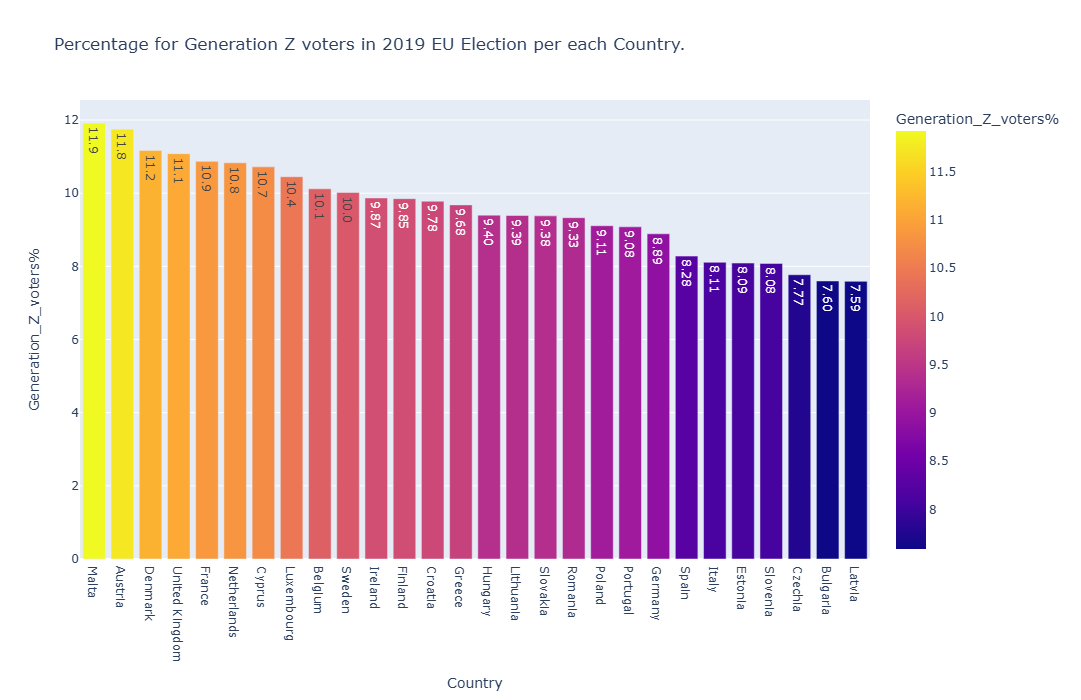

In [781]:
fig=px.bar(Generation_Z_voters_percenrtage,x='Country',y='Generation_Z_voters%',color='Generation_Z_voters%',text_auto='.3s',
           title='Percentage for Generation Z voters in 2019 EU Election per each Country.',height=700, width=1300)
fig.show()


In [782]:
Generation_Z_voters=all_countries.sort_values(by='Generation_Z_voters', ascending = False)
Generation_Z_voters

,Country,total_voters,Generation_Z_voters,Generation_Z_voters%,older_generations_voters,older_generations_voters%
20,Germany,70102621.0,6233563.0,8.89,63869058.0,91.11
7,United Kingdom,52837136.0,5855185.0,11.08,46981951.0,88.92
15,France,52732008.0,5730894.0,10.87,47001114.0,89.13
8,Italy,50974954.0,4132683.0,8.11,46842271.0,91.89
18,Spain,38190245.0,3162188.0,8.28,35028057.0,91.72
10,Poland,31131793.0,2836109.0,9.11,28295684.0,90.89
26,Netherlands,13929735.0,1507942.0,10.83,12421793.0,89.17
1,Romania,15802864.0,1473822.0,9.33,14329042.0,90.67
14,Belgium,9173132.0,928473.0,10.12,8244659.0,89.88
25,Austria,7566196.0,889047.0,11.75,6677149.0,88.25


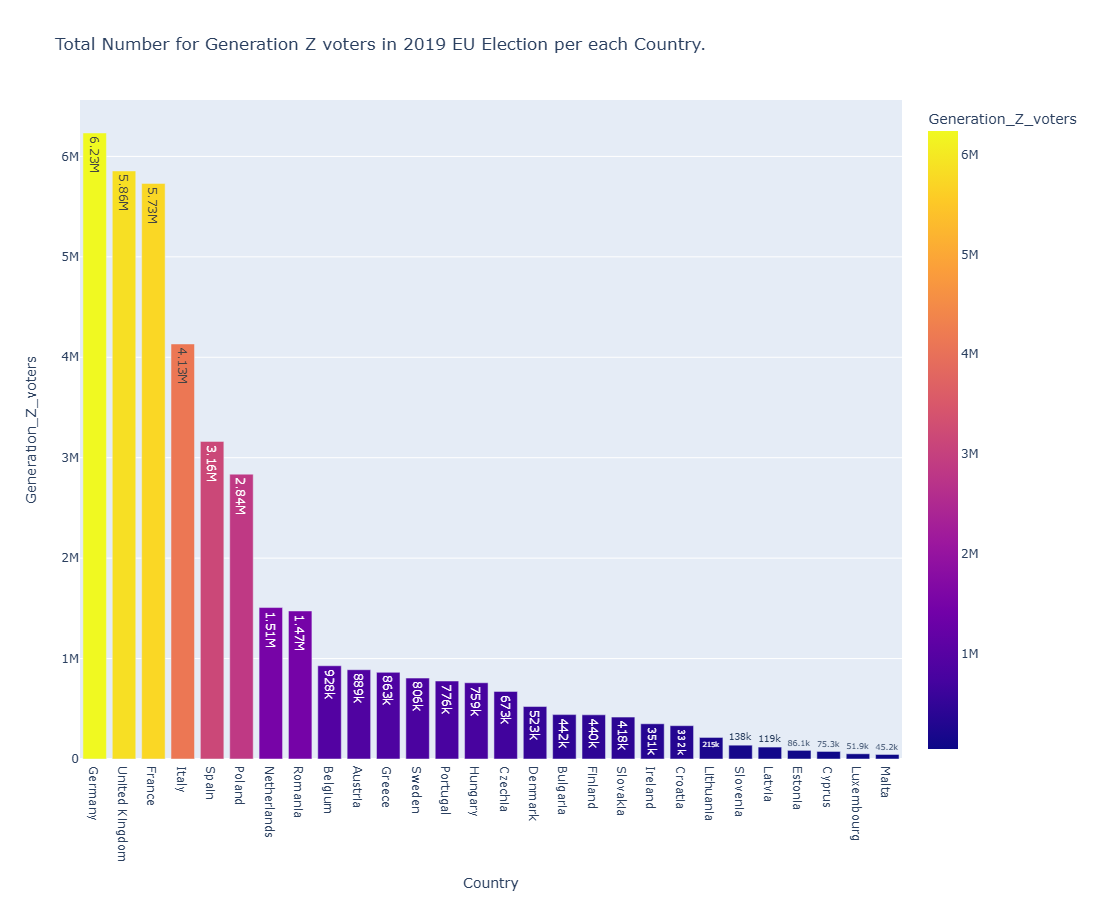

In [783]:
fig=px.bar(Generation_Z_voters,x='Country',y='Generation_Z_voters',color='Generation_Z_voters',
           title='Total Number for Generation Z voters in 2019 EU Election per each Country.',text_auto='.3s',height=900, width=1300)
fig.show()